In [ ]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

import plotly.figure_factory as ff
import plotly.express as px

InteractiveShell.ast_node_interactivity = "all"

sns.set(style="darkgrid")

# **1. Analysis on Wildfire Data**

Reading the Data

In [ ]:
fires = pd.read_csv('/content/sample_data/wildfire_processed_data.csv', parse_dates=['acq_date'])
fires.head()

,latitude,longitude,acq_date,satellite,instrument,confidence
0,34.81,24.12,2018-05-08,Terra,MODIS,62
1,34.94,26.13,2023-08-26,Aqua,MODIS,60
2,34.94,26.14,2014-08-13,Terra,MODIS,66
3,34.94,26.14,2016-03-08,Terra,MODIS,66
4,34.94,26.14,2023-08-25,Aqua,MODIS,62


# **Defining helper functions**

Here we are defining functions for floor-rounding lat-lon values (casting them as integers), to analyse wildfire occurrences in bins.

In [ ]:
def latitude_wfire_counter(df):
    fires["lat_int"] = fires["latitude"].astype(int)
    lat_fire_df = df[["lat_int", "confidence"]].groupby(["lat_int"]).count().\
                reset_index().rename(columns={"lat_int": "Latitude", "confidence": "Wildfire Count"})
    lat_fire_df["Latitude"] = lat_fire_df["Latitude"].astype(str) + " - " + (lat_fire_df["Latitude"]+0.99).astype(str)
    return lat_fire_df

def longitude_wfire_counter(df):
    df["long_int"] = df["longitude"].astype(int)
    lon_fire_df = df[["long_int", "confidence"]].groupby(["long_int"]).count().\
                reset_index().rename(columns={"long_int": "Longitude", "confidence": "Wildfire Count"})
    lon_fire_df["Longitude"] = lon_fire_df["Longitude"].astype(str) + " - " + (lon_fire_df["Longitude"]+0.99).astype(str)
    return lon_fire_df

# **Total wildfire count for latitude intervals**

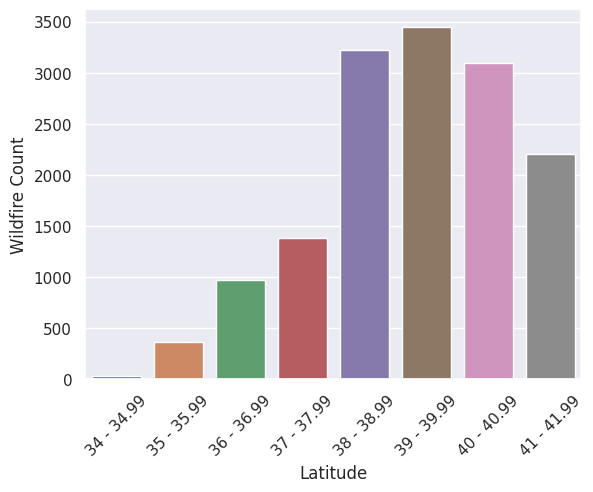

,Latitude,Wildfire Count
0,34 - 34.99,29
1,35 - 35.99,364
2,36 - 36.99,972
3,37 - 37.99,1387
4,38 - 38.99,3222
5,39 - 39.99,3450
6,40 - 40.99,3098
7,41 - 41.99,2204


In [ ]:
lat_fire_df = latitude_wfire_counter(fires)
ax = sns.barplot(x=lat_fire_df["Latitude"], y=lat_fire_df["Wildfire Count"])
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

lat_fire_df

# **Total wildfire count for longitude intervals**

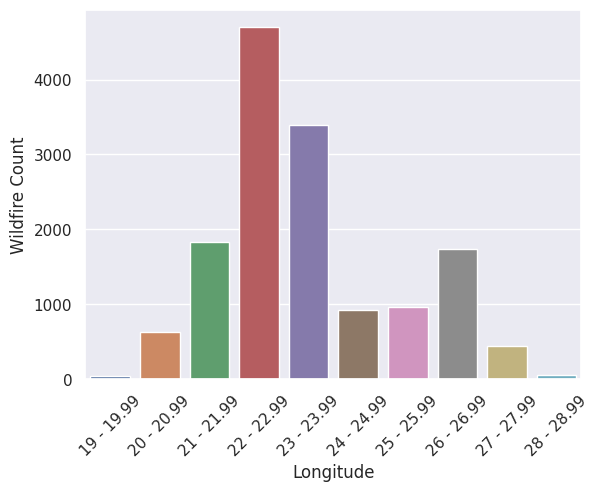

,Longitude,Wildfire Count
0,19 - 19.99,46
1,20 - 20.99,630
2,21 - 21.99,1826
3,22 - 22.99,4699
4,23 - 23.99,3400
5,24 - 24.99,925
6,25 - 25.99,960
7,26 - 26.99,1735
8,27 - 27.99,449
9,28 - 28.99,56


In [ ]:
lon_fire_df = longitude_wfire_counter(fires)
ax = sns.barplot(x=lon_fire_df["Longitude"], y=lon_fire_df["Wildfire Count"])
for item in ax.get_xticklabels():
    item.set_rotation(45)
plt.show()

lon_fire_df

# **Total wildfire count by year for latitude intervals**

Latitude - Wildfire Count in 2013


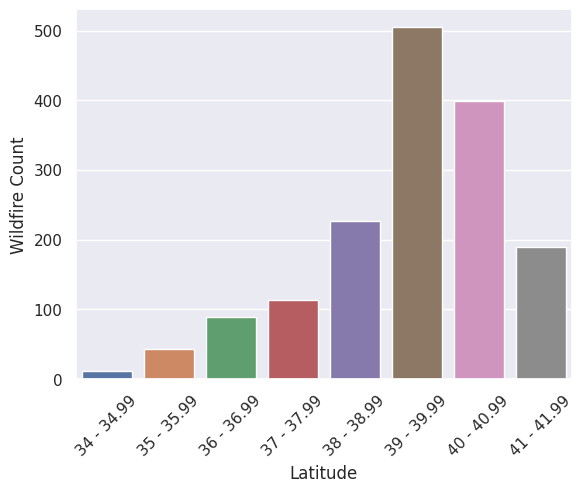

Latitude - Wildfire Count in 2014


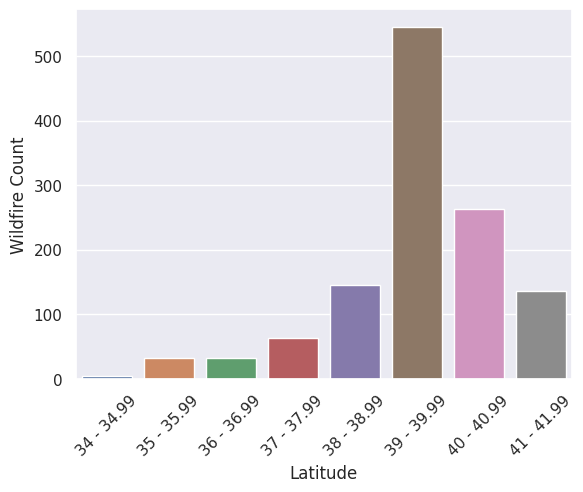

Latitude - Wildfire Count in 2015


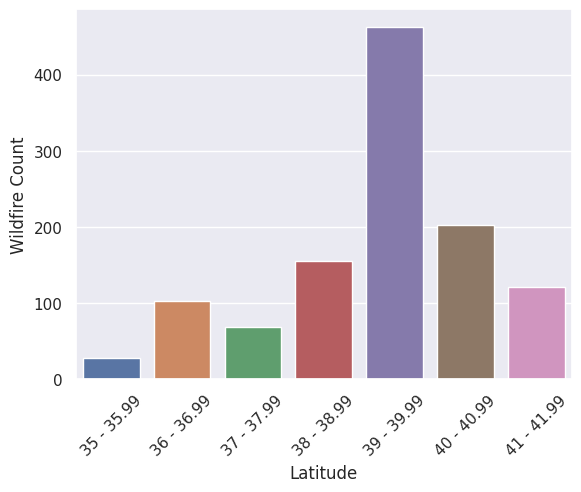

Latitude - Wildfire Count in 2016


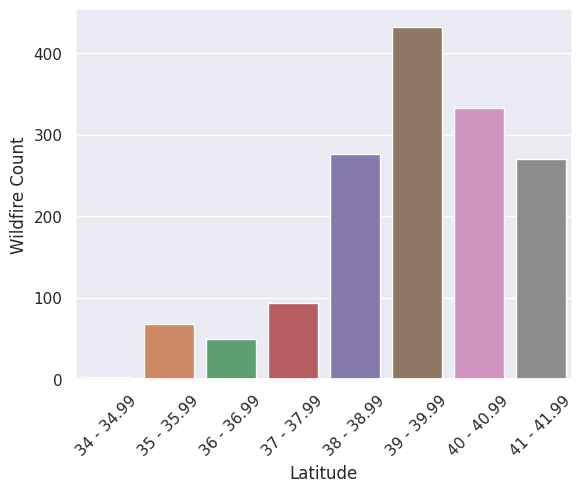

Latitude - Wildfire Count in 2017


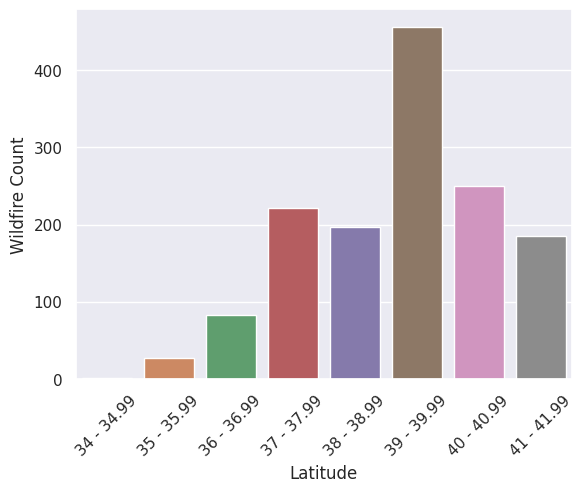

Latitude - Wildfire Count in 2018


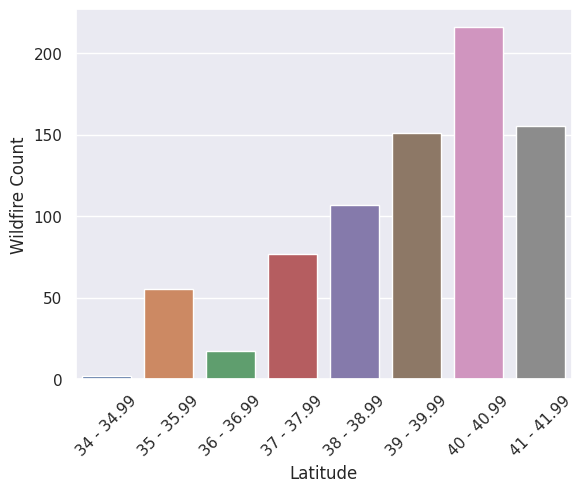

Latitude - Wildfire Count in 2019


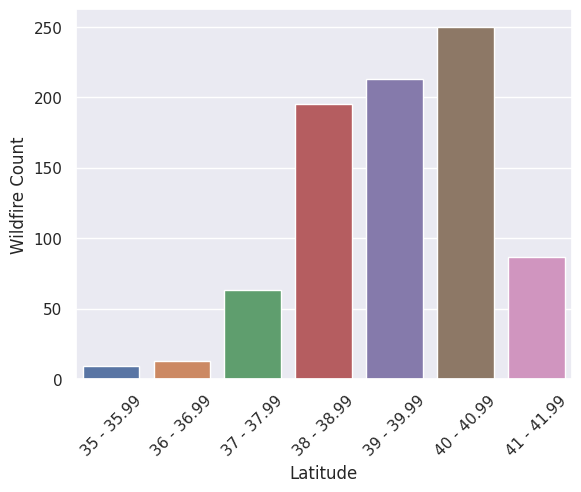

Latitude - Wildfire Count in 2020


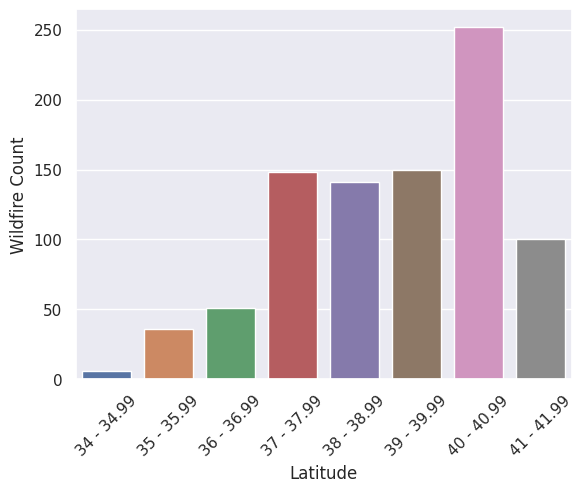

In [ ]:
for year in range(2013, 2021, 1):
    print("Latitude - Wildfire Count in", year)
    lat_fire_df = latitude_wfire_counter(fires[fires["acq_date"].dt.year == year].copy())
    ax = sns.barplot(x=lat_fire_df["Latitude"], y=lat_fire_df["Wildfire Count"])
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

# **Total wildfire count by year for longitude intervals**

Longitude - Wildfire Count in 2013


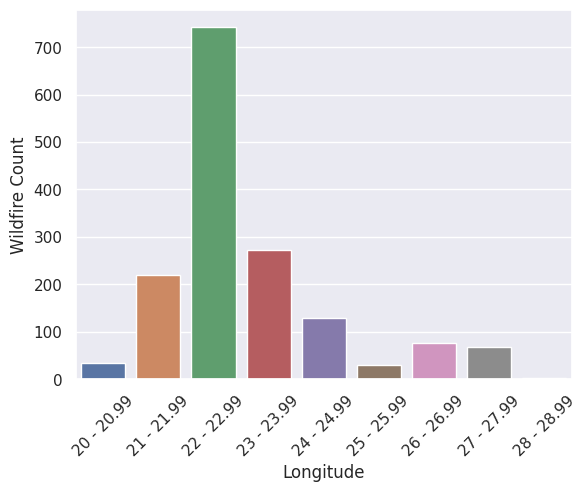

Longitude - Wildfire Count in 2014


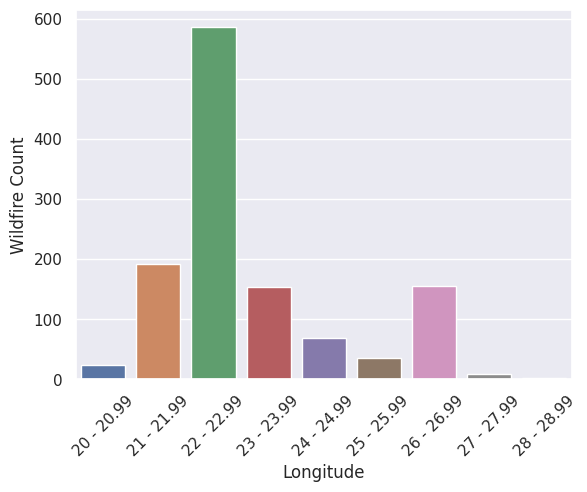

Longitude - Wildfire Count in 2015


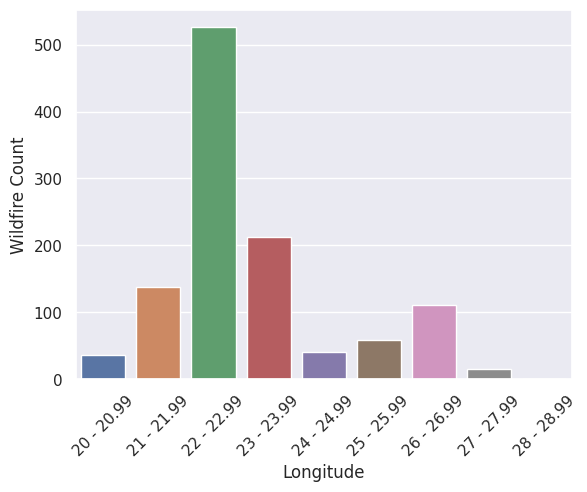

Longitude - Wildfire Count in 2016


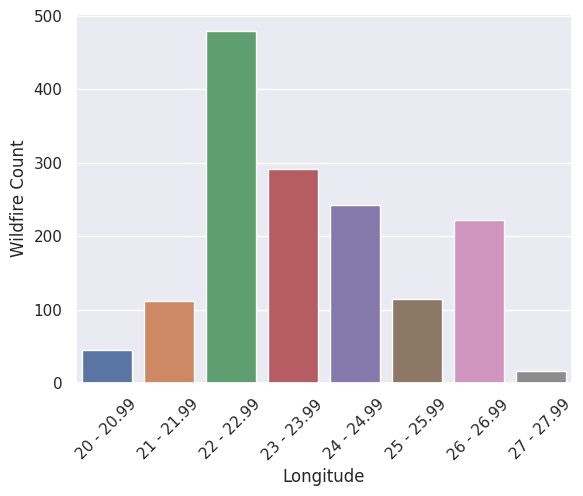

Longitude - Wildfire Count in 2017


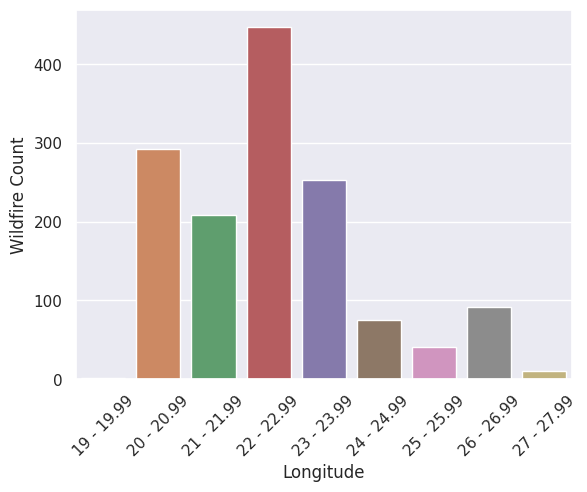

Longitude - Wildfire Count in 2018


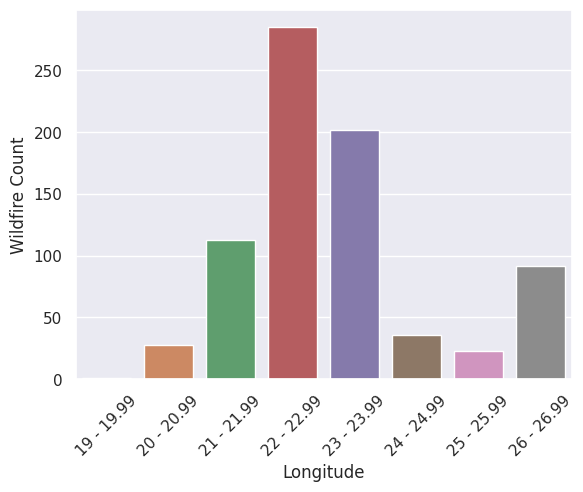

Longitude - Wildfire Count in 2019


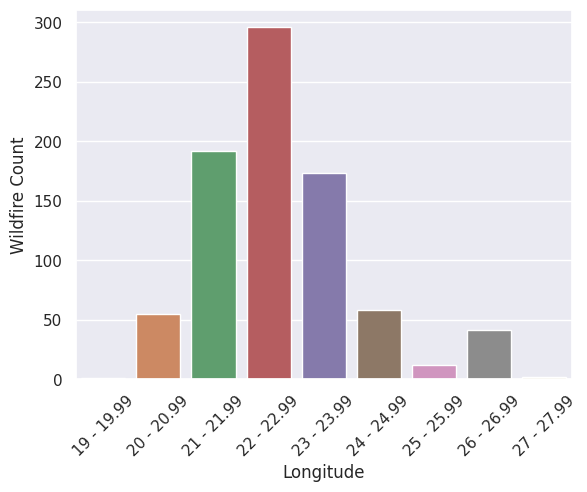

Longitude - Wildfire Count in 2020


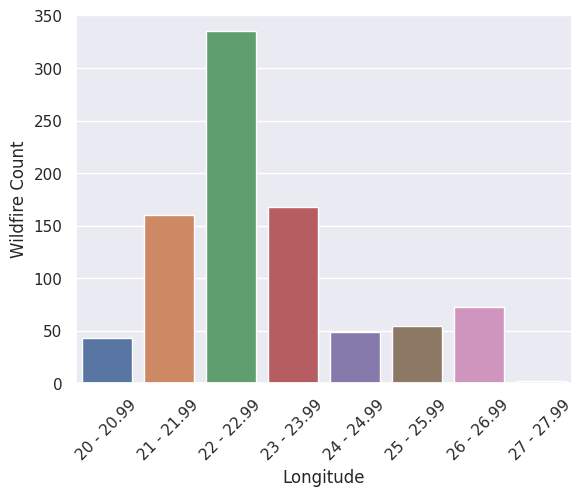

In [ ]:
for year in range(2013, 2021, 1):
    print("Longitude - Wildfire Count in", year)
    lon_fire_df = longitude_wfire_counter(fires[fires["acq_date"].dt.year == year].copy())
    ax = sns.barplot(x=lon_fire_df["Longitude"], y=lon_fire_df["Wildfire Count"])
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()

# **Total wildfire count by year**

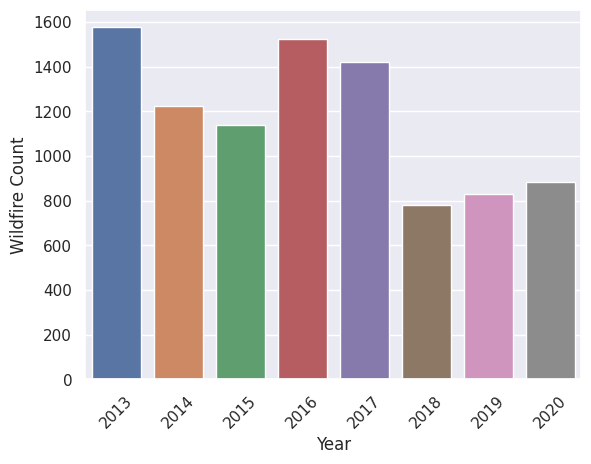

In [ ]:
yearly_fire_count = []
years = []

for year in range(2013, 2021, 1):
    yearly_fire_count.append(len(fires[fires["acq_date"].dt.year == year]))
    years.append(year)

yearly_fire_count = np.array(yearly_fire_count)
years = np.array(years)

ax = sns.barplot(x=years, y=yearly_fire_count)
_ = ax.set(xlabel='Year', ylabel='Wildfire Count')

for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

# **Total wildfire count by month**

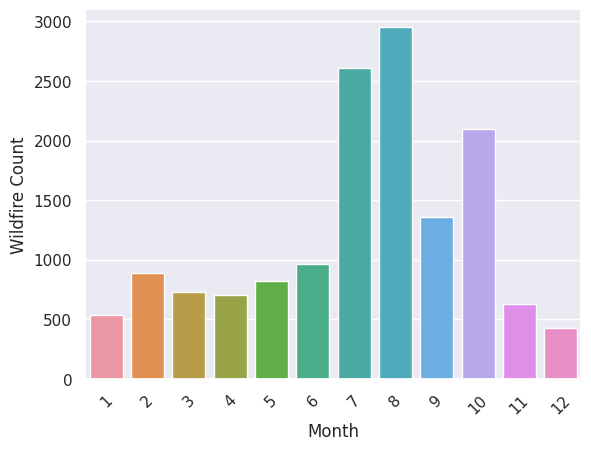

In [ ]:
monthly_fire_count = []
months = []

for month in range(1, 13, 1):
    monthly_fire_count.append(len(fires[fires["acq_date"].dt.month == month]))
    months.append(month)

monthly_fire_count = np.array(monthly_fire_count)
months = np.array(months)

ax = sns.barplot(x=months, y=monthly_fire_count)
_ = ax.set(xlabel='Month', ylabel='Wildfire Count')

for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

# **Distribution of detection confidence**

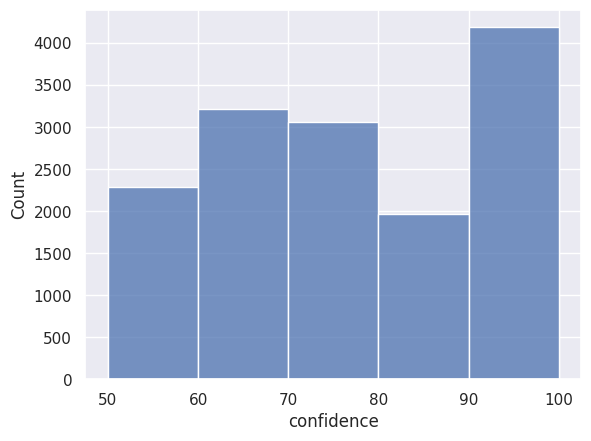

In [ ]:
ax = sns.histplot(x=fires["confidence"], bins=5)
plt.show()

# **Sample count of satellite types**

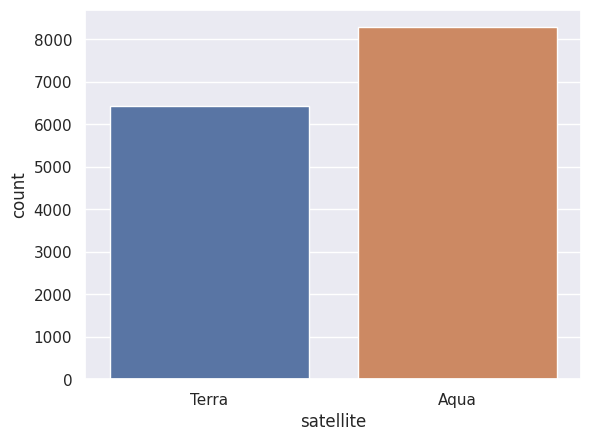

In [ ]:
ax = sns.countplot(x=fires["satellite"])
plt.show()

# **2. Analysis on Temperature Data**


**Reading the Data**

In [ ]:
temp_df = pd.read_csv('/content/sample_data/Greece_temperature.csv')
temp_df.head(10)

,latitude,longitude,month,year,temperature_min,temperature_avg,temperature_max
0,38.6,21.4,1,2014,4.3,7.5,11.0
1,38.6,21.4,1,2014,4.3,7.5,11.0
2,38.6,21.4,1,2014,4.3,7.5,11.0
3,38.6,21.4,1,2014,4.3,7.5,11.0
4,38.6,21.4,1,2014,4.3,7.5,11.0
5,38.6,21.4,1,2014,4.3,7.5,11.0
6,38.6,21.4,1,2014,4.3,7.5,11.0
7,38.6,21.4,1,2014,4.3,7.5,11.0
8,38.6,21.4,1,2014,4.3,7.5,11.0
9,38.6,21.4,1,2014,4.3,7.5,11.0


**Calculating yearly temperature means for latitude-longitude pairs.**

In [ ]:
yearly_means = temp_df.groupby(["longitude", "latitude", "year"]).mean()\
               .drop("month", axis=1).reset_index()
yearly_means.head()

,longitude,latitude,year,temperature_min,temperature_avg,temperature_max
0,19.9,39.6,2013,12.726027,17.626027,22.347945
1,19.9,39.6,2014,12.698630,17.724658,22.507671
2,19.9,39.6,2015,12.726027,17.626027,22.347945
3,19.9,39.6,2016,12.679781,17.705738,22.485519
4,19.9,39.6,2017,12.726027,17.626027,22.347945


**Calculating monthly temperature means for latitude-longitude pairs.**

In [ ]:
monthly_means = temp_df.groupby(["longitude", "latitude", "month"]).mean()\
               .drop("year", axis=1).reset_index()
monthly_means.head()

,longitude,latitude,month,temperature_min,temperature_avg,temperature_max
0,19.9,39.6,1,5.281818,10.245455,14.581818
1,19.9,39.6,2,5.636452,10.564194,14.318065
2,19.9,39.6,3,7.200000,12.063636,16.554545
3,19.9,39.6,4,10.100000,15.027273,19.400000
4,19.9,39.6,5,14.381818,19.481818,24.281818


# **Yearly temperature means for Greece**

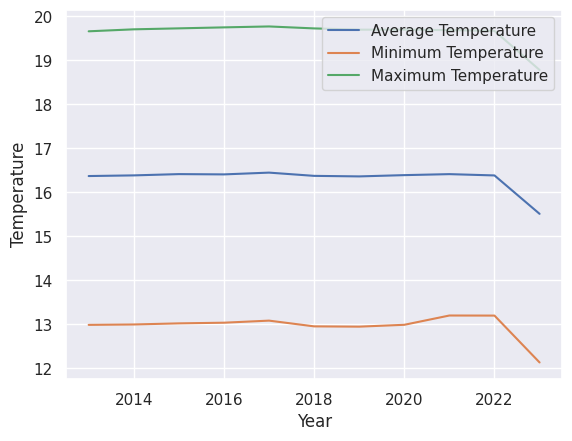

In [ ]:
Greece_yearly_means = yearly_means.groupby("year").mean().reset_index()

ax = sns.lineplot(data=Greece_yearly_means, x="year", y="temperature_avg", label="Average Temperature")
ax_2 = sns.lineplot(data=Greece_yearly_means, x="year", y="temperature_min", label="Minimum Temperature")
ax_3 = sns.lineplot(data=Greece_yearly_means, x="year", y="temperature_max", label="Maximum Temperature")
ax = ax.set(xlabel='Year', ylabel='Temperature')
plt.show()

# **Monthly temperature means for Greece**

Maximum Temperature by year


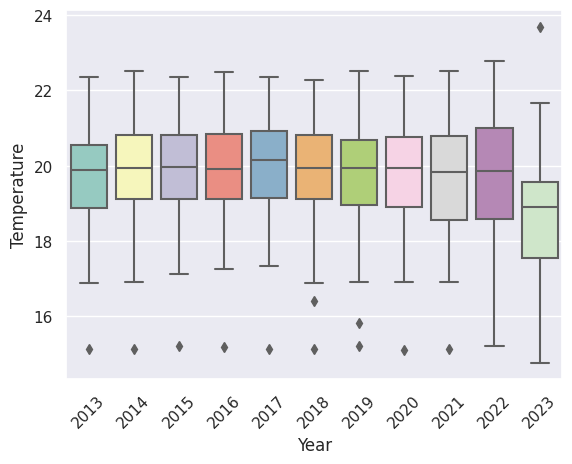

Minimum Temperature by year


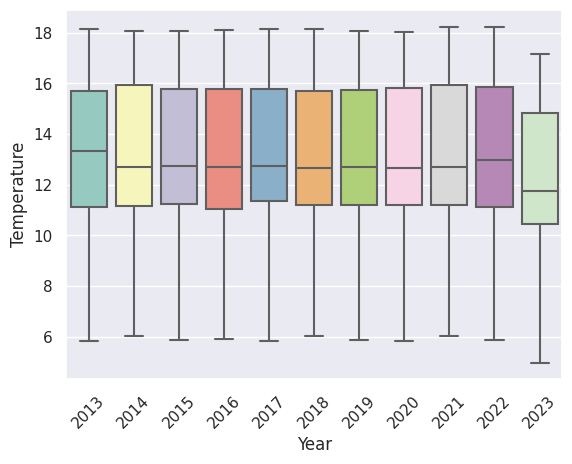

Average Temperature by year


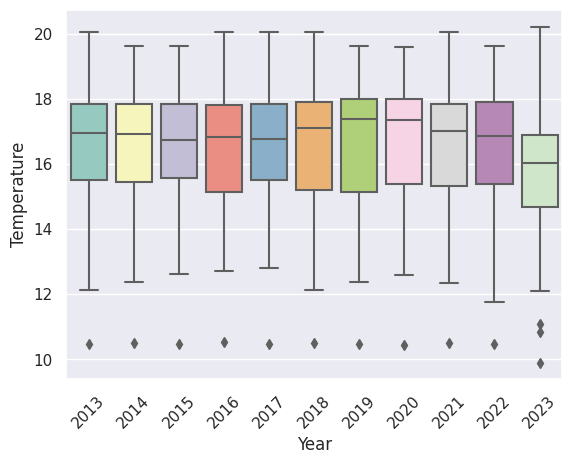

In [ ]:
cols = ["temperature_max", "temperature_min", "temperature_avg"]
col_labels = ["Maximum Temperature", "Minimum Temperature", "Average Temperature"]

for col_i, col in enumerate(cols):
    print(col_labels[col_i], "by year")
    ax = sns.boxplot(x="year", y=col, data=yearly_means, palette="Set3")
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    ax = ax.set(xlabel='Year', ylabel='Temperature')
    plt.show()

# **Temperature distribution for latitude and longitude**

**The distributions are brought from all the data.**

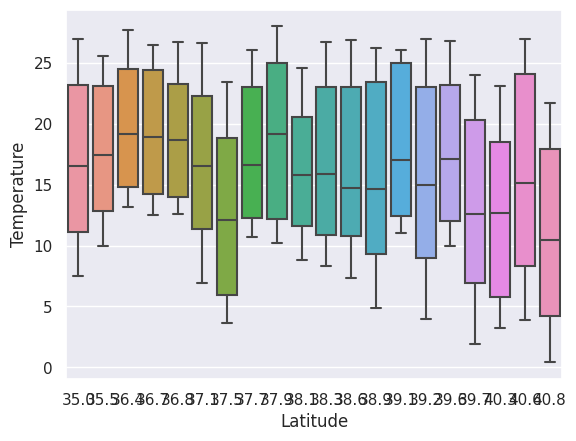

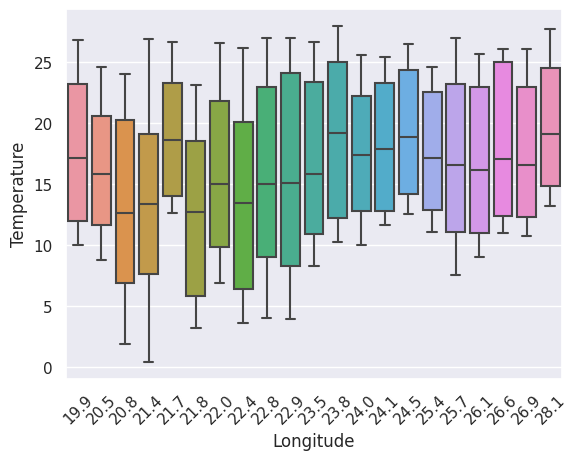

In [ ]:
ax = sns.boxplot(data=temp_df, x="latitude", y="temperature_avg")
ax = ax.set(xlabel='Latitude', ylabel='Temperature')
plt.show()

ax = sns.boxplot(data=temp_df, x="longitude", y="temperature_avg")
for item in ax.get_xticklabels():
        item.set_rotation(45)
ax = ax.set(xlabel='Longitude', ylabel='Temperature')
plt.show()

# **Minimum, maximum and average temperatures for each month**

**Taking the average of the monthly temperature data by years.**

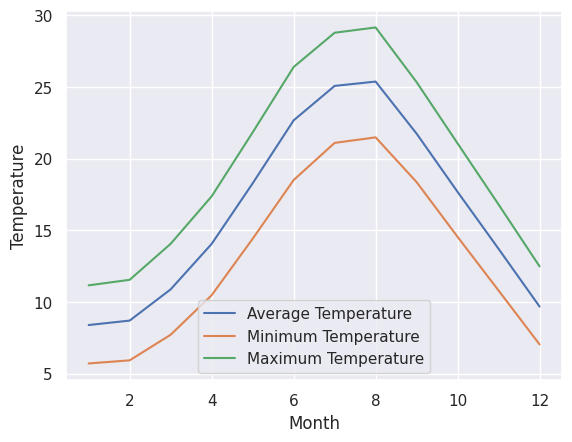

In [ ]:
Greece_monthly_means = monthly_means.groupby("month").mean().reset_index()

ax = sns.lineplot(data=Greece_monthly_means, x="month", y="temperature_avg", label="Average Temperature")
ax_2 = sns.lineplot(data=Greece_monthly_means, x="month", y="temperature_min", label="Minimum Temperature")
ax_3 = sns.lineplot(data=Greece_monthly_means, x="month", y="temperature_max", label="Maximum Temperature")
ax = ax.set(xlabel='Month', ylabel='Temperature')
plt.show()

#  **Minimum, maximum and average temperature distributions for each month**


**Monthly temperature values are brought from all years.**

Maximum Temperature by month


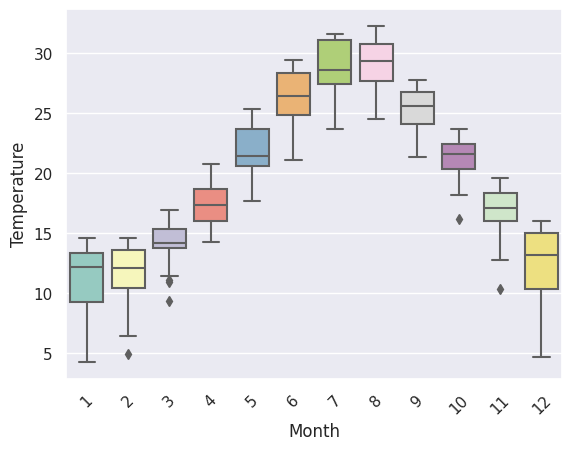

Minimum Temperature by month


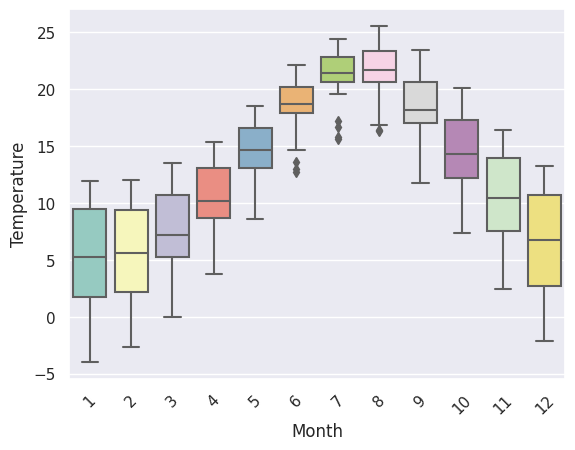

Average Temperature by month


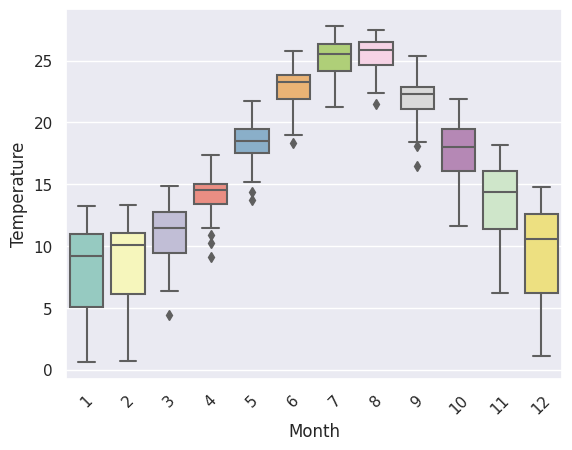

In [ ]:
cols = ["temperature_max", "temperature_min", "temperature_avg"]
col_labels = ["Maximum Temperature", "Minimum Temperature", "Average Temperature"]

for col_i, col in enumerate(cols):
    print(col_labels[col_i], "by month")
    ax = sns.boxplot(x="month", y=col, data=monthly_means, palette="Set3")
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    ax = ax.set(xlabel='Month', ylabel='Temperature')
    plt.show()

# **3. Analysis on Final Data**

**Reading the Data**

In [ ]:
full_df = pd.read_csv('/content/sample_data/final_data.csv')
full_df.head()

,latitude,longitude,year,month,fire_cnt,fire,fire_cnt_before,fire_before,fire_cnt_last_year,fire_last_year,fire_cnt_last_year_same_month,fire_last_year_same_month,temperature_min,temperature_avg,temperature_max
0,35.0,25.7,2013,7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,26.4,31.6
1,35.0,25.7,2013,7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,26.4,31.6
2,35.0,25.7,2013,7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,26.4,31.6
3,35.0,25.7,2013,7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,26.4,31.6
4,35.0,25.7,2013,7,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,21.6,26.4,31.6


In [ ]:
corr = full_df.corr()
fig = px.imshow(corr, aspect="auto", color_continuous_scale=px.colors.sequential.RdBu)
fig.show()

In [ ]:
feature_label_corr = full_df.corr()[["fire"]].drop(index='fire')
fig = px.imshow(feature_label_corr, aspect="auto", color_continuous_scale=px.colors.sequential.RdBu)
fig.show()